# Neural Network from scratch in numpy

In [46]:
import pandas as pd
import numpy as np

In [31]:
data = pd.read_csv("data/train.csv")

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Label:  5


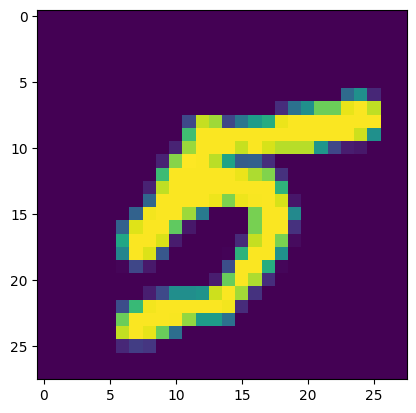

In [47]:
import matplotlib.pyplot as plt

idx = 300
g = plt.imshow(X_train[:, idx].reshape(28,28)) 
print("Label: ", Y_train[idx])

# Model

**Data**

* $\mathbb{X} \in \R^{m \times n}$ where $ m = 784$ and $n = 41000$, is our dataset where each column is a digit (aka an observation)
* $Y \in \R^n$, the labels


**Forward Propagation**

$$ Z^{[1]} = W^{[1]}\cdot \mathbb{X} + b^{[1]}$$
$$ A^{[1]} = ReLu(Z^{[1]}) $$
$$ Z^{[2]} = W^{[2]}\cdot A^{[1]} + b^{[2]} $$
$$ A^{[2]} = SoftMax(Z^{[2]}) $$

**Backward Propagation**

$$ dZ^{[2]} = A^{[2]} - Y $$
$$ dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T} $$
$$ db^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}} $$
$$ dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]}) $$
$$ dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T} $$
$$ db^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}} $$


**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1


# Define some functions

In [34]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLu(x):
    return np.maximum(x, 0)

def SoftMax(x):
    x = np.exp(x) / sum(np.exp(x))
    return x

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = SoftMax(Z2)
    return Z1, A1, Z2, A2

def ReLu_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLu_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [35]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [38]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))
            print("-"*20)
    return W1, b1, W2, b2

In [39]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
Accuracy:  0.15692682926829268
--------------------
Iteration:  10
Accuracy:  0.2906829268292683
--------------------
Iteration:  20
Accuracy:  0.4017804878048781
--------------------
Iteration:  30
Accuracy:  0.45814634146341465
--------------------
Iteration:  40
Accuracy:  0.5018292682926829
--------------------
Iteration:  50
Accuracy:  0.5400243902439025
--------------------
Iteration:  60
Accuracy:  0.5720731707317073
--------------------
Iteration:  70
Accuracy:  0.6002195121951219
--------------------
Iteration:  80
Accuracy:  0.623390243902439
--------------------
Iteration:  90
Accuracy:  0.6419756097560976
--------------------
Iteration:  100
Accuracy:  0.6594878048780488
--------------------
Iteration:  110
Accuracy:  0.673829268292683
--------------------
Iteration:  120
Accuracy:  0.6866585365853659
--------------------
Iteration:  130
Accuracy:  0.6984146341463414
--------------------
Iteration:  140
Accuracy:  0.7089024390243902
--------------------
Iterat

# Make predictions


In [40]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [43]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("Accuracy on Test set: ", get_accuracy(dev_predictions, Y_dev))

Accuracy on Test set:  0.845
